In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_csv('./german_credit_data.csv')

In [4]:
df = df.rename(columns={'laufkont': "status", 'laufzeit': "duration", "moral": "credit_history", "verw": "purpose", "hoehe": "amount" , "sparkont": "savings", "beszeit": "employment_duration", "rate": "installment_rate", "famges": "personal_status_sex", "buerge": "other_debtors", "wohnzeit": "present_residence", "verm": "property", "alter": "age", "weitkred": "other_installment_plans", "wohn": "housing", "bishkred":"number_credits", "beruf":"job", "pers": "people_liable", "telef": "telephone", "gastarb": "foreign_worker", "kredit": "credit_risk"})

In [5]:
print("Dataset shape:")
df.shape

Dataset shape:


(1000, 21)

In [6]:
print("\nBasic statistics:")
df.describe()


Basic statistics:


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [28]:
print("\nColumn info:")
df.info()


Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   in

In [29]:
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [7]:
print("Missing values per columns")
print(df.isnull().sum())

print("\nData types:")
print(df.dtypes)

Missing values per columns
status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

Data types:
status                     int64
duration                   int64
credit_history             int64
purpose                    int64
amount                     int64
savings                    int64
employment_duration        int64
installment_rate           int64
personal_status_sex        int64
other_debtors              int64
present_

In [39]:
for col in df.columns:
    print(f"\n{col}: {df[col].nunique()} unique values")
    if df[col].nunique() < 10:
        print(f"Values: {df[col].unique()}")


status: 4 unique values
Values: [1 2 4 3]

duration: 33 unique values

credit_history: 5 unique values
Values: [4 2 3 0 1]

purpose: 10 unique values

amount: 923 unique values

savings: 5 unique values
Values: [1 2 3 5 4]

employment_duration: 5 unique values
Values: [2 3 4 1 5]

installment_rate: 4 unique values
Values: [4 2 3 1]

personal_status_sex: 4 unique values
Values: [2 3 4 1]

other_debtors: 3 unique values
Values: [1 3 2]

present_residence: 4 unique values
Values: [4 2 3 1]

property: 4 unique values
Values: [2 1 3 4]

age: 53 unique values

other_installment_plans: 3 unique values
Values: [3 1 2]

housing: 3 unique values
Values: [1 2 3]

number_credits: 4 unique values
Values: [1 2 3 4]

job: 4 unique values
Values: [3 2 1 4]

people_liable: 2 unique values
Values: [2 1]

telephone: 2 unique values
Values: [1 2]

foreign_worker: 2 unique values
Values: [2 1]

credit_risk: 2 unique values
Values: [1 0]


In [44]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [96]:
# Identify Categorical vs Numeric
# cat_features = X_train.select_dtypes(include=[np.number]).columns
categorical_cols = ['status', 'purpose','credit_history','savings', 'employment_duration', 'installment_rate','personal_status_sex', 'other_debtors','present_residence', 'property', 'other_installment_plans','housing', 'number_credits','job', 'people_liable', 'telephone', 'foreign_worker']
numeric_cols = ['duration','amount','age']  

# for col in X.columns:
#     unique_count = X[col].nunique()
#     if unique_count < 10:
#         categorical_cols.append(col)
#     else:
#         numeric_cols.append(col)

In [97]:
# Identify target column (usually named 'class' or similar)
target_col = "credit_risk"

y = df[target_col].values
if y.min() == 1:
    y = y - 1
    
X = df.drop(target_col, axis=1)

In [99]:
# Spliting data to test and train
indices = np.arange(len(X))
np.random.shuffle(indices)

train_size = int(0.8 * len(X))
train_idx, test_idx = indices[:train_size], indices[train_size:]

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

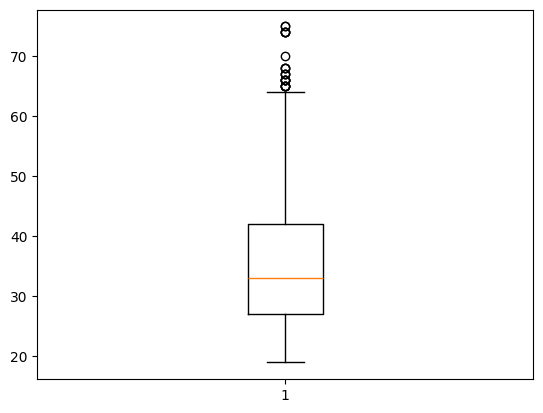

In [82]:
# Outliers
plt.boxplot(X['age'])
plt.show()

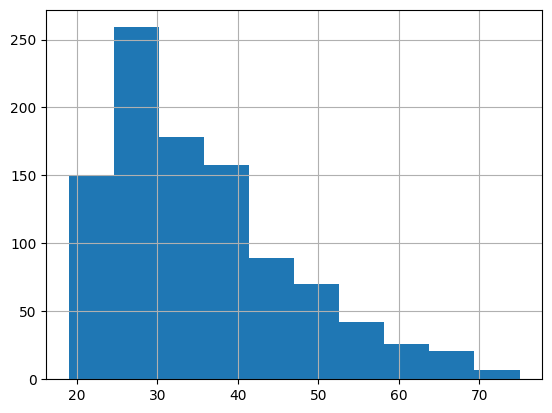

In [84]:
df["age"].hist(bins=10)
plt.show()

In [100]:
# Feature Selection
for col in X.columns:
    values = X[col].to_list()
    mean = sum(values) / len(values)
    variance = sum((x - mean)**2 for x in values) / len(values) 

    if variance < 0.01:
        print(f"{col}: LOW variance ({variance:.4f}) → consider dropping")
    else:
        print(f"{col}: OK ({variance:.4f})")

status: OK (1.5801)
duration: OK (145.2696)
credit_history: OK (1.1720)
purpose: OK (7.5244)
amount: OK (7959959.5705)
savings: OK (2.4940)
employment_duration: OK (1.4585)
installment_rate: OK (1.2503)
personal_status_sex: OK (0.5009)
other_debtors: OK (0.2280)
present_residence: OK (1.2170)
property: OK (1.1018)
age: OK (128.7542)
other_installment_plans: OK (0.4974)
housing: OK (0.2808)
number_credits: OK (0.3334)
job: OK (0.4268)
people_liable: OK (0.1310)
telephone: OK (0.2408)
foreign_worker: OK (0.0356)


In [113]:
class Preprocessor:
    def __init__(self, categorical_cols, numeric_cols, missing_strategy):
        self.categorical_cols = categorical_cols
        self.missing_strategy = missing_strategy
        self.numeric_cols = numeric_cols
        self.means = {}
        self.stds = {}
        self.categories = {}

    def handle_missing_values(self, X):
        df_clean = X.copy()
    
        for col in df_clean.columns:    
            if df_clean[col].isnull().any():
                df_clean[f'{col}_was_missing'] = df_clean[col].isnull().astype(int)
                
                if self.missing_strategy == "mean" and df_clean[col].dtype in ['int64', 'float64']:
                    mean_val = df_clean[col].mean()
                    df_clean[col].fillna(mean_val , inplace=True)
    
                if self.missing_strategy == 'mode':
                    mode_val = df_clean[col].mode()[0]
                    df_clean[col].fillna(mode_val, inplace=True)
    
        return df_clean

    def fit(self, X):
        X = self.handle_missing_values(X)
        
        for col in self.numeric_cols:
            self.means[col] = X[col].mean()
            self.stds[col] = X[col].std() if X[col].std() > 0 else 1.0

        for col in self.categorical_cols:
            self.categories[col] = sorted(X[col].dropna().unique())

        return self

    def transform(self, X):
        X = self.handle_missing_values(X).copy()
        
        for col in self.categorical_cols:
            for val in self.categories[col]:
                new_col_name = f'{col}_{val}'
                X[new_col_name] = (X[col] == val).astype(int)
    
            X.drop(col ,axis=1 , inplace=True)
        for col in self.numeric_cols:
            if col in X.columns:
                if self.stds[col] != 0:
                    X[col] = (X[col] - self.means[col]) / self.stds[col]
                else:
                    X[col] = 0
        return X

### Regularized Logistic Regression

In [126]:
class LogisticRegressionFromScratch:
    def __init__(self, lr=0.01, num_iter=10000, lambda_=1):
        self.lr = lr
        self.num_iter = num_iter
        self.lambda_ = lambda_
        self.w = None
        self.b = None
        self.j_history = []
        self.w_history = []
        
    def sigmoid(self, z):
        g = 1 / (1 + np.exp(-z))
        return g 
        
    def initialize_weights(self, n_features):
        self.w = np.zeros(n_features)
        self.b = 0.0

    def compute_cost(self, X, y):
        m = X.shape[0]
        # loss_sum = 0
        # for i in range(m):
        #     f_wb = self.sigmoid(np.dot(X , self.w) + self.b)
        #     loss = -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)
        #     loss_sum += loss
    
        # total_cost = loss_sum / m 
        f_wb = self.sigmoid(np.dot(X , self.w) + self.b) 
        cost = -(1/m) * np.sum(y*np.log(f_wb) + (1-y)*np.log(1-f_wb))
    
        return cost
        
    def gradient(self, X, y):
        m = X.shape[0] 
        # dj_dw = np.zeros(w.shape)
        # dj_db = 0
        # for i in range(m):
        #     f_wb = self.sigmoid(np.dot(X, self.w) + self.b)
        #     err = f_wb - y[i]
    
        #     dj_db += err
    
        #     for j in range(n):
        #         dj_dw[j] += err * X[i][j]
        # dj_db = dj_db / m
        # dj_dw = dj_dw / m
    
        f_wb = self.sigmoid(np.dot(X, self.w) + self.b)
        err = f_wb - y
    
        dj_db = np.sum(err) / m
        dj_dw = np.dot(X.T, err) / m
    
        return dj_db , dj_dw

    def compute_cost_reg(self, X, y):
        m , n = X.shape

        cost_without_reg = self.compute_cost(X, y)
    
        # reg_cost = 0 
        # for j in range(n):
        #     reg_cost += self.w[j]**2
        # reg_cost = (self.lambda_ / (2 * m)) * reg_cost
        reg_cost = (self.lambda_ / (2 * m)) * np.sum(self.w ** 2)
    
        total_cost = cost_without_reg + reg_cost
    
        return total_cost

    def compute_gradient_reg(self, X, y):
        m, n = X.shape

        dj_db , dj_dw = self.gradient(X, y)

        # for j in range(n):
        #     dj_dw_j_reg = (self.lambda_ / m) * self.w[j]
        #     dj_dw[j] = dj_dw[j] + dj_dw_j_reg 

        dj_dw = dj_dw + (self.lambda_ / m) * self.w

        return dj_db , dj_dw

    def gradient_descent(self, X, y):
        X = np.array(X)
        n = X.shape[1]
        self.initialize_weights(n)

        for i in range(self.num_iter):
            dj_db, dj_dw = self.compute_gradient_reg(X, y)

            self.w = self.w - self.lr * dj_dw
            self.b = self.b - self.lr * dj_db

            if i % 100 == 0 or i == (self.num_iter - 1):
                cost = self.compute_cost_reg(X, y)
                self.j_history.append(cost)
            if i % math.ceil(self.num_iter/10) == 0 or i == (self.num_iter - 1):
                self.w_history.append(self.w.copy())

        return self

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.w) + self.b)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

In [114]:
prep = Preprocessor(categorical_cols , numeric_cols , "mean")

prep.fit(X_train)

X_train_standardized = prep.transform(X_train)

X_test_standardized = prep.transform(X_test)


In [127]:
log_reg = LogisticRegressionFromScratch(0.1, 10000, 1)
log_reg.gradient_descent(X_train_standardized , y_train)

In [128]:
y_pred_train = log_reg.predict(X_train_standardized)
y_pred_test = log_reg.predict(X_test_standardized)

In [129]:
y_train_accuraccy = np.mean((y_pred_train == y_train) * 100)
y_train_accuraccy

np.float64(79.0)

In [130]:
y_test_accuracy = np.mean((y_pred_test == y_test) * 100)
y_test_accuracy

np.float64(71.5)

### Model with sklearn

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X, y = df.drop(['credit_risk'], axis=1), df['credit_risk']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
cat_col = X_train.select_dtypes(exclude=[np.number]).columns
num_col = X_train.select_dtypes(include=[np.number]).columns

In [42]:
df.isna().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [44]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr = LogisticRegression(max_iter = 100000)

In [123]:
lr.fit(X_train_standardized, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100000
,multi_class,'deprecated'


In [124]:
lr.score(X_train_standardized, y_train)

0.79125

In [125]:
lr.score(X_test_standardized, y_test)

0.72